In [1]:
import pandas as pd
metrics_data = pd.read_csv("out.csv")
print(metrics_data.head())

   Unnamed: 0                                              tweet  \
0           0  !!! RT @mayasolovely: As a woman you shouldn't...   
1           1  "@Addicted2Guys: -SimplyAddictedToGuys http://...   
2           2  "@ArizonasFinest6: Why the eggplant emoji doe?...   
3           3  "@CB_Baby24: @white_thunduh alsarabsss" hes a ...   
4           4  "@DevilGrimz: @VigxRArts you're fucking gay, b...   

   Predicted Labels  Basic Hashing Basic Hashing Accuracy  Levenshtein  \
0             False          False          True Negative        False   
1             False          False          True Negative         True   
2             False          False          True Negative         True   
3             False           True         False Positive         True   
4             False           True         False Positive         True   

  Levenshtein Accuracy  Soundex Soundex Accuracy  Soundex and Levenshtein  \
0        True Negative     True   False Positive                    F

In [2]:
metrics_data["All Methods Accuracy"].value_counts()
 

All Methods Accuracy
True Positive     80
True Negative     79
False Positive    21
False Negative    20
Name: count, dtype: int64

In [27]:
df = pd.DataFrame({'Method': ['ML Call', 'Basic Hashing', 'Levenshtein', 'Soundex', 'Soundex and Levenshtein', 'All'],
                   'True Positive': [1,96,82,99,80,80],
                   'True Negative': [1,72,66,86,79,79],
                   'False Positive': [1,28,34,14,21,21],
                   'False Negative': [1,4,18,1,20,20]})

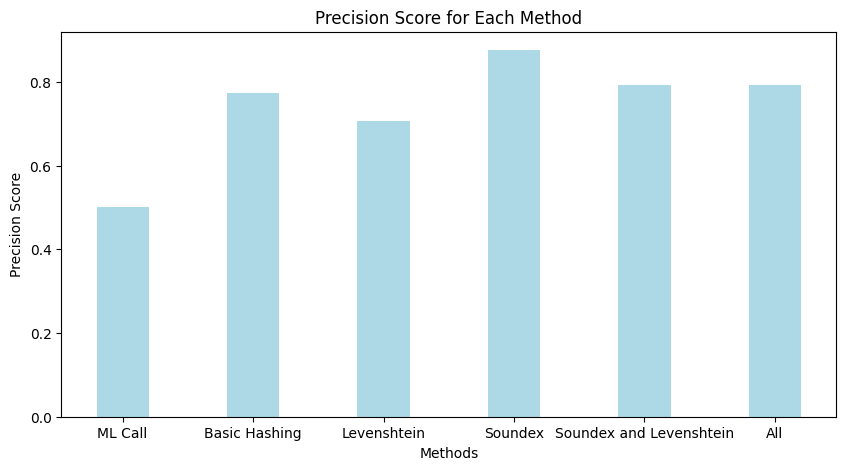

In [9]:
#Precision
import matplotlib.pyplot as plt
from performance import *
mlp = precision(1,1)
bhp = precision(96,28)
lp = precision(82,34)
sp = precision(99,14)
slp = precision(80,21)
allp = precision(80,21)
precisiondf = pd.DataFrame({'Method': ['ML Call', 'Basic Hashing', 'Levenshtein', 'Soundex', 'Soundex and Levenshtein', 'All'],
                   'Precision': [mlp,bhp,lp,sp,slp,allp]})
methods = list(precisiondf["Method"])
precisionscores = list(precisiondf["Precision"])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, precisionscores, color ='lightblue', 
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Precision Score")
plt.title("Precision Score for Each Method")
plt.show()

0.96
0.7741935483870968


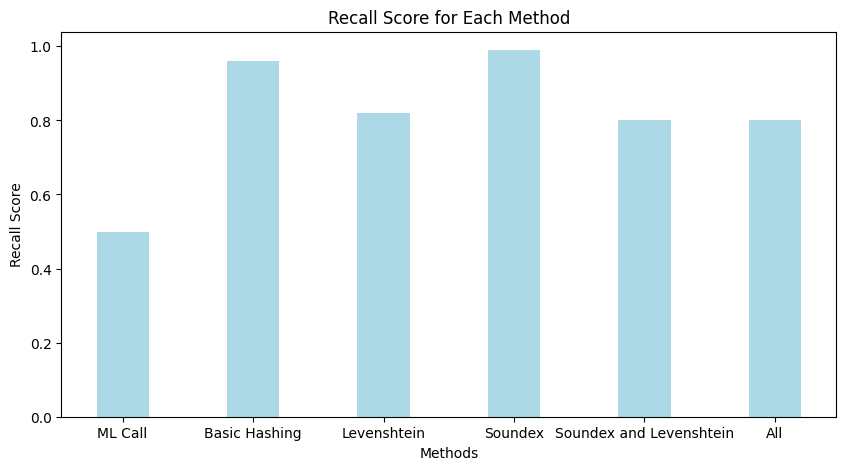

In [13]:
#Recall
mlr = recall(1,1)
bhr = recall(96,4)
print(bhr)
print(bhp)
lr = recall(82,18)
sr = recall(99,1)
slr = recall(80,20)
allr = recall(80,20)
recalldf = pd.DataFrame({'Method': ['ML Call', 'Basic Hashing', 'Levenshtein', 'Soundex', 'Soundex and Levenshtein', 'All'],
                   'Recall': [mlr,bhr,lr,sr,slr,allr]})
methods = list(recalldf["Method"])
recallscores = list(recalldf["Recall"])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, recallscores, color ='lightblue', 
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Recall Score")
plt.title("Recall Score for Each Method")
plt.show()

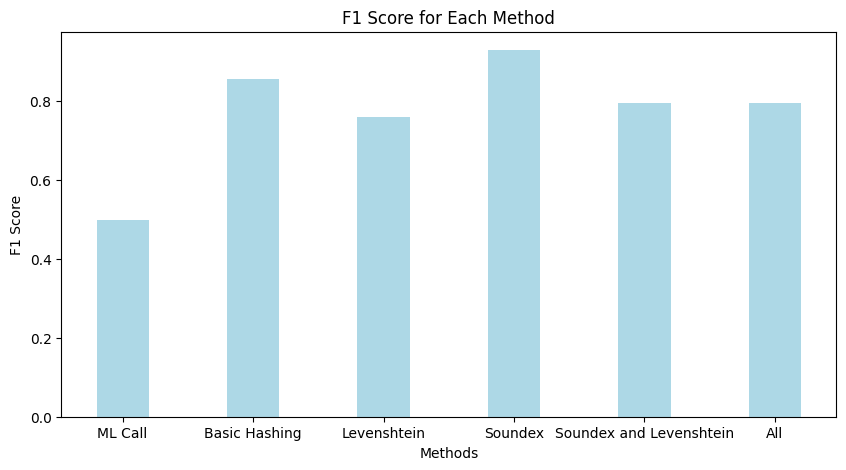

In [15]:
#F1
mlf1 = f1(mlp,mlr)
bhf1 = f1(bhp,bhr)
lf1 = f1(lp,lr)
sf1 = f1(sp,sr)
slf1 = f1(slp,slr)
allf1 = f1(allp,allr)
f1df = pd.DataFrame({'Method': ['ML Call', 'Basic Hashing', 'Levenshtein', 'Soundex', 'Soundex and Levenshtein', 'All'],
                   'F1': [mlf1,bhf1,lf1,sf1,slf1,allf1]})
methods = list(f1df["Method"])
f1scores = list(f1df["F1"])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, f1scores, color ='lightblue', 
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("F1 Score")
plt.title("F1 Score for Each Method")
plt.show()

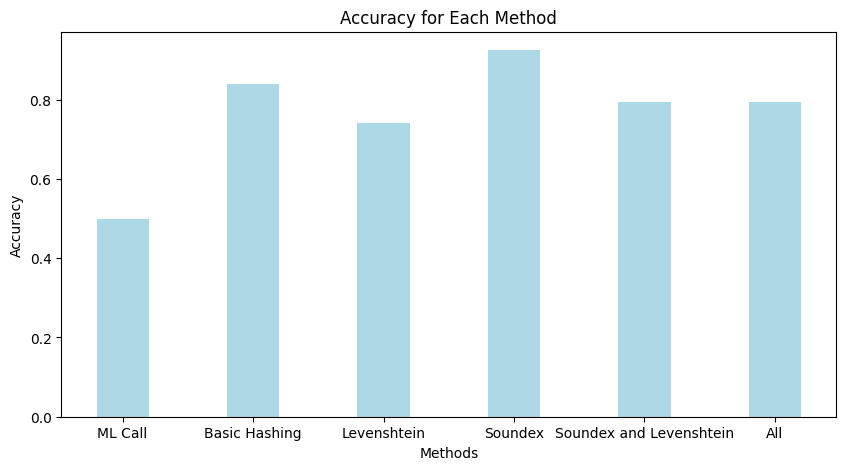

In [17]:
#Accuracy
mla = accuracy(1,1,1,1)
bha = accuracy(96,72,28,4)
la = accuracy(82,66,34,18)
sa = accuracy(99,86,14,1)
sla = accuracy(80,79,21,20)
alla = accuracy(80,79,21,20)
accuracydf = pd.DataFrame({'Method': ['ML Call', 'Basic Hashing', 'Levenshtein', 'Soundex', 'Soundex and Levenshtein', 'All'],
                   'Accuracy': [mla,bha,la,sa,sla,alla]})

methods = list(accuracydf["Method"])
accscores = list(accuracydf["Accuracy"])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, accscores, color ='lightblue', 
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Accuracy for Each Method")
plt.show()

[Text(0, 0, 'ML Call'),
 Text(1, 0, 'Basic Hashing'),
 Text(2, 0, 'Levenshtein (L)'),
 Text(3, 0, 'Soundex (S)'),
 Text(4, 0, 'S and L'),
 Text(5, 0, 'All')]

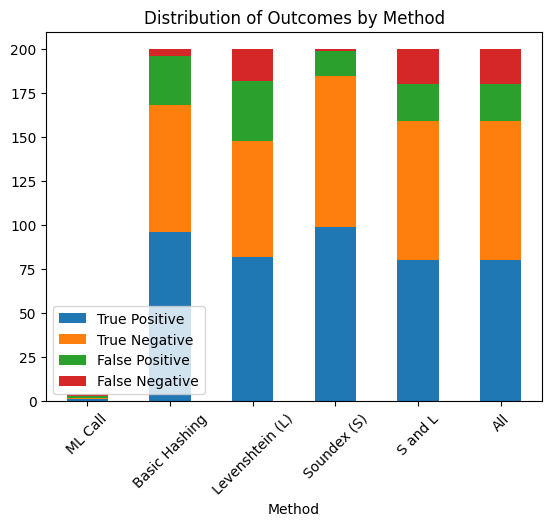

In [36]:
#Proportions segmented bar plot for each method
ax = df.plot.bar(x='Method', stacked=True, title='Distribution of Outcomes by Method')
ax.set_xticklabels(['ML Call','Basic Hashing','Levenshtein (L)', 'Soundex (S)', 'S and L', 'All'], rotation=45)

In [ ]:
#Graph comparing runtimes

In [ ]:
#ROC Curve

In [ ]:
#Precision Matrix